# Covid Data Analysis in Mexico

In [234]:
# Import all the needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from scipy.integrate import odeint
from scipy.integrate import quad

Area =  3.0533333333333332
Real Area =  3.141592653589793


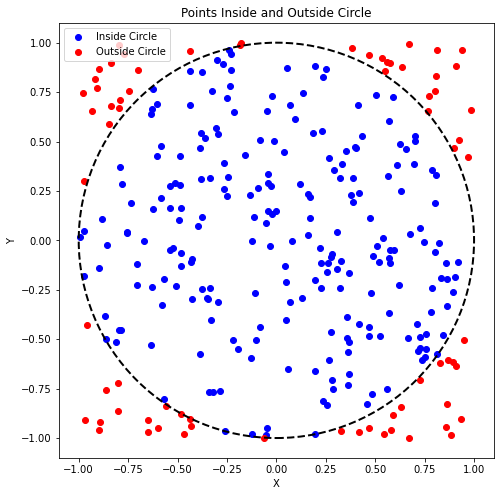

In [369]:
# Montecarlo Integration to estimate PI
N = 300
count = 0
i = 0
radius = 1
out_circle = []
in_circle =[]

while i < N:
    x = np.random.uniform(-radius, radius)
    y = np.random.uniform(-radius, radius)
    if x**2 + y**2 <= radius**2:
        count += 1
        in_circle.append((x,y))
    else:
        out_circle.append((x,y))
    i += 1

area = count/N * (2*radius)**2
print("Area = ", area)
print("Real Area = ", np.pi*radius**2)

# Unpack x and y coordinates from in_circle and out_circle
in_x, in_y = zip(*in_circle)
out_x, out_y = zip(*out_circle)

# Plot points inside and outside the circle
plt.figure(figsize=(8,8))
plt.scatter(in_x, in_y, color='blue', label='Inside Circle')
plt.scatter(out_x, out_y, color='red', label='Outside Circle')

# Plot circle circumference
circle = plt.Circle((0, 0), radius, color='black', fill=False, linestyle='--', linewidth=2)
plt.gca().add_patch(circle)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points Inside and Outside Circle')
plt.gca().set_aspect('equal', adjustable='box')  # Equal aspect ratio
plt.legend()
plt.show()


Estimated integral: 0.6916214505980828
Integral of the function over the interval [0.8, 3]: 0.6768400757156462


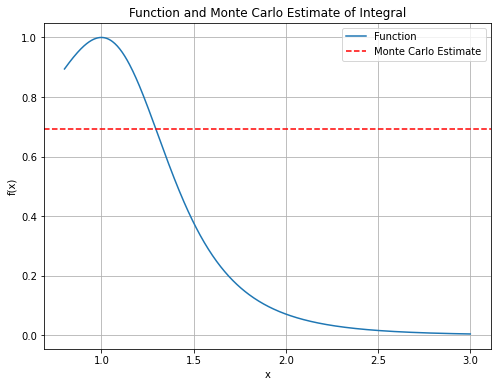

In [371]:
#Monte Carlo Integration to estimate function F(x)

# Define the function
def func(x):
    return 1 / (1 + np.sinh(2*x) * (np.log(x))**2)

# Define the bounding region [a, b]
a = 0.8
b = 3

# Number of samples
N = 100

# Generate random samples from the uniform distribution over the interval [a, b]
samples = np.random.uniform(a, b, N)

# Evaluate the function for each sample
function_values = func(samples)

# Calculate the estimate of the integral
integral_estimate = np.mean(function_values) * (b - a)

print("Estimated integral:", integral_estimate)

# Calculate the integral
integral, error = quad(func, a, b)

print("Integral of the function over the interval [0.8, 3]:", integral)

# Plot the function
x_values = np.linspace(a, b, 500)
plt.figure(figsize=(8,6))
plt.plot(x_values, func(x_values), label='Function')

# Plot the estimates
plt.axhline(y=integral_estimate, color='r', linestyle='--', label='Monte Carlo Estimate')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function and Monte Carlo Estimate of Integral')
plt.legend()
plt.grid(True)
plt.show()

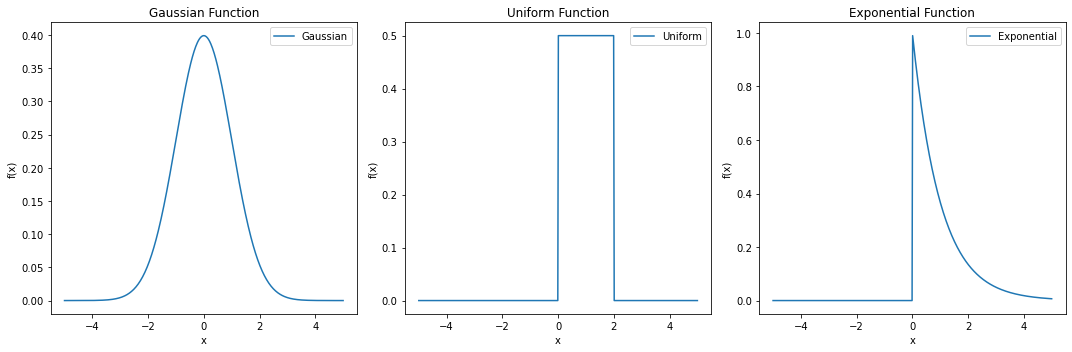

In [372]:
#Importance Sampling 

# Define the toy functions
def gaussian(x):
    return stats.norm.pdf(x)

def uniform_(x):
    return stats.uniform(0,2).pdf(x)

def exponential(x):
    return stats.expon(0).pdf(x)

# Plotting the toy functions
x_values = np.linspace(-5, 5, 500)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(x_values, gaussian(x_values), label='Gaussian')
plt.title('Gaussian Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(x_values, [uniform_(x) for x in x_values], label='Uniform')
plt.title('Uniform Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(x_values, exponential(x_values), label='Exponential')
plt.title('Exponential Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.tight_layout()
plt.show()

Estimation = 0.8654854108322544
Integral of the function: 0.8646647167633872


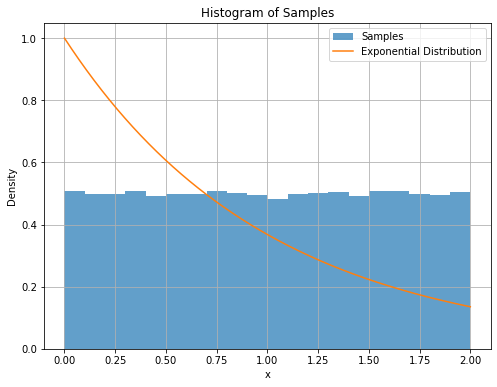

In [377]:
#We want to estimate the exponential using the uniform 

N = 100000
a = 0
b = 2

samples = stats.uniform(a,b).rvs(N)
weights = exponential(samples)/uniform_(samples)

estimation = weights.mean()
print("Estimation =", estimation)

# Calculate the integral
integral, error = quad(exponential, a, b)

print("Integral of the function:", integral)

# Plot the histogram of samples
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=20, density=True, alpha=0.7, label='Samples')

# Plot the true distribution (exponential)
x_values = np.linspace(a, b, 1000)
plt.plot(x_values, exponential(x_values), label='Exponential Distribution')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of Samples')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/4x/6c9p63ls07x580slpnw2nx2h0000gn/T/ipykernel_94383/2045287692.py:69: RuntimeWarning: invalid value encountered in double_scalars
  true_state_estimate[t] = np.sum(particles[:, t] * weights[:, t]) / np.sum(weights[:, t])


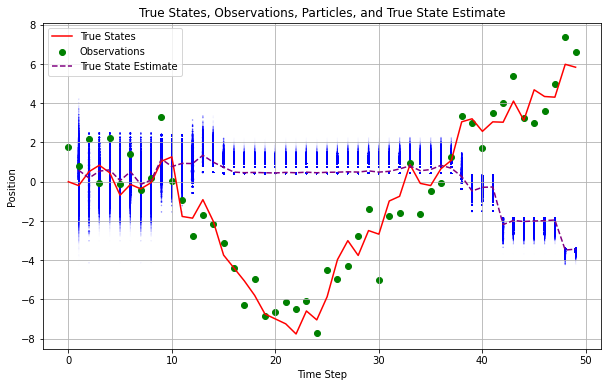

In [365]:
#Particle filtering
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_particles = 10000
sigma_motion = 1
sigma_observation = 1.2
T = 50  # Number of time steps

# True state evolution model
def true_state_evolution(x_prev):
    return x_prev + np.random.normal(0, sigma_motion)

# Observation model
def observe_state(x):
    return x + np.random.normal(0, sigma_observation)

# Generate true state and observations
true_states = np.zeros(T)
observations = np.zeros(T)
true_states[0] = 0  # Initial position
observations[0] = observe_state(true_states[0])
for t in range(1, T):
    true_states[t] = true_state_evolution(true_states[t-1])
    observations[t] = observe_state(true_states[t])

# Particle filtering with adaptive resampling
particles = np.zeros((num_particles, T))
weights = np.zeros((num_particles, T))
effective_sample_sizes = np.zeros(T)  # Track effective sample size over time

# Particle filtering with adaptive resampling and regularization
particles = np.zeros((num_particles, T))
weights = np.zeros((num_particles, T))
effective_sample_sizes = np.zeros(T)  # Track effective sample size over time

# Set adaptive resampling threshold
threshold = num_particles / 2  # Example threshold value (can be adjusted based on requirements)

for t in range(T):
    if t == 0:
        particles[:, t] = np.random.normal(0, sigma_observation, num_particles)  # Initialize particles
    else:
        # Predict step
        particles[:, t] = true_state_evolution(particles[:, t-1])
        
        # Update step
        observed_state = observations[t]
        observation_likelihoods = np.exp(-0.5 * ((particles[:, t] - observed_state) / sigma_observation)**2)
        weights[:, t] = observation_likelihoods / np.sum(observation_likelihoods)
        
        # Calculate effective sample size
        effective_sample_sizes[t] = 1 / np.sum(weights[:, t]**2)
        
        # Resampling decision based on effective sample size
        if effective_sample_sizes[t] < threshold:
            # Resampling
            resampled_indices = np.random.choice(np.arange(num_particles), size=num_particles, p=weights[:, t])
            particles[:, t] = particles[resampled_indices, t]
        else:
            # No resampling
            particles[:, t] = particles[:, t-1]

# True state estimate from particle filter
true_state_estimate = np.zeros(T)

for t in range(T):
    true_state_estimate[t] = np.sum(particles[:, t] * weights[:, t]) / np.sum(weights[:, t])


# Plot true states, observations, particles, and true state estimate
plt.figure(figsize=(10, 6))
for t in range(T):
    plt.scatter([t] * num_particles, particles[:, t], s=weights[:, t]*1000, alpha=0.5, color='blue')
plt.plot(true_states, color='red', label='True States')
plt.scatter(np.arange(T), observations, color='green', marker='o', label='Observations')
plt.plot(true_state_estimate, color='purple', label='True State Estimate', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.title('True States, Observations, Particles, and True State Estimate')
plt.legend()
plt.grid(True)
plt.show()